# Step 1: Load Dataset

We import the necessary libraries and load the Twitter sentiment dataset into a Pandas DataFrame.  
Since the dataset has no headers, we assign column names for clarity.


In [1]:
import pandas as pd

# Loading dataset
df = pd.read_csv("twitter_training.csv", header=None)

# Previewing the data
df.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Step 2: Data Preview and Inspection

We check the dataset shape, missing values, and the distribution of sentiment and entity values to understand data quality and composition.


In [2]:
# Renaming columns
df.columns = ['id', 'entity', 'sentiment', 'text']

# Previewing
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Step 3: Handle Missing Values

Tweets with missing text are dropped to ensure we analyze only valid entries.  
We then reset the DataFrame index.


In [3]:
# Checking data shape
print("Rows:", df.shape[0], " | Columns:", df.shape[1])

# Checking for missing values
print(df.isnull().sum())

# Viewing unique sentiment values
print(df['sentiment'].value_counts())

# Viewing top entities
print(df['entity'].value_counts().head(10))


Rows: 74682  | Columns: 4
id             0
entity         0
sentiment      0
text         686
dtype: int64
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
entity
Microsoft                    2400
MaddenNFL                    2400
TomClancysRainbowSix         2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64


# Step 4: Clean Tweet Text

We define a function to clean tweets by removing URLs, mentions, hashtags, and special characters, then convert text to lowercase.  
This prepares the text for analysis.


In [5]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+", "", text)           # Removing URLs
        text = re.sub(r"@\w+", "", text)              # Removing mentions
        text = re.sub(r"#\w+", "", text)              # Removing hashtags
        text = re.sub(r"[^a-zA-Z\s]", "", text)       # Removing non-letters
        return text.lower().strip()
    else:
        return ""   # If not a string, return empty string

# Step 5: Sentiment Distribution Visualization

We plot bar and pie charts to visualize the frequency and proportions of each sentiment category in the dataset.


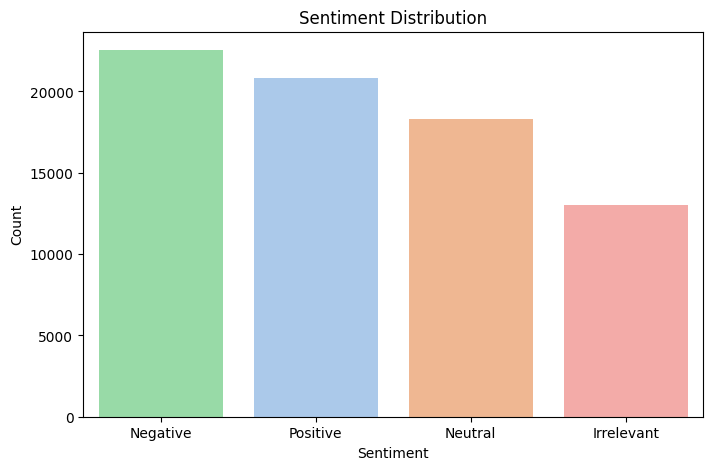

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', hue='sentiment', order=df['sentiment'].value_counts().index, palette='pastel', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


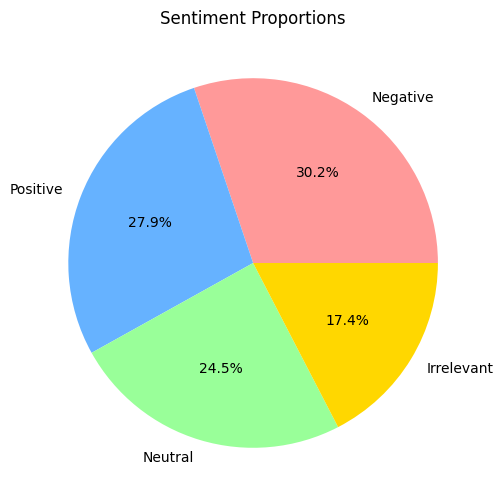

In [8]:
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'],
    figsize=(6,6),
    title='Sentiment Proportions'
)
plt.ylabel('')
plt.show()


In [9]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"@\w+", "", text)
        text = re.sub(r"#\w+", "", text)
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        return text.lower().strip()
    else:
        return ""

df['clean_text'] = df['text'].apply(clean_text)


# Step 6: Generate Word Clouds by Sentiment

We generate word clouds to visualize the most frequent words in tweets categorized as Positive, Negative, and Neutral.


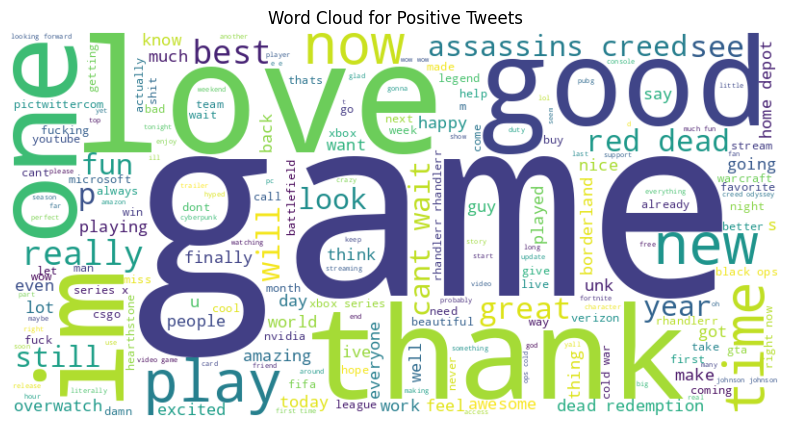

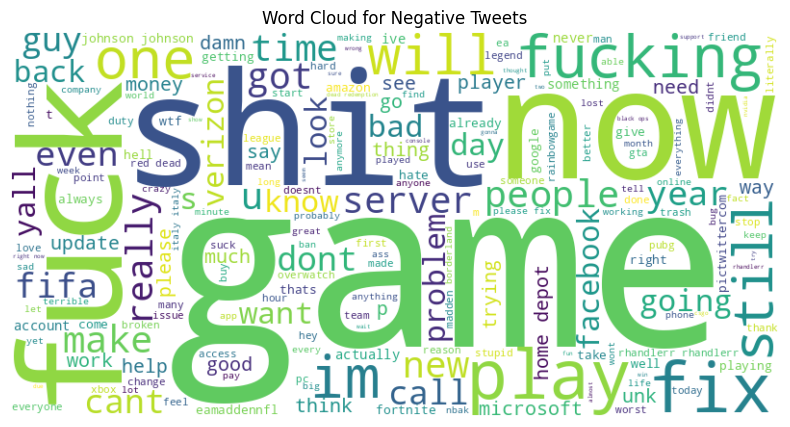

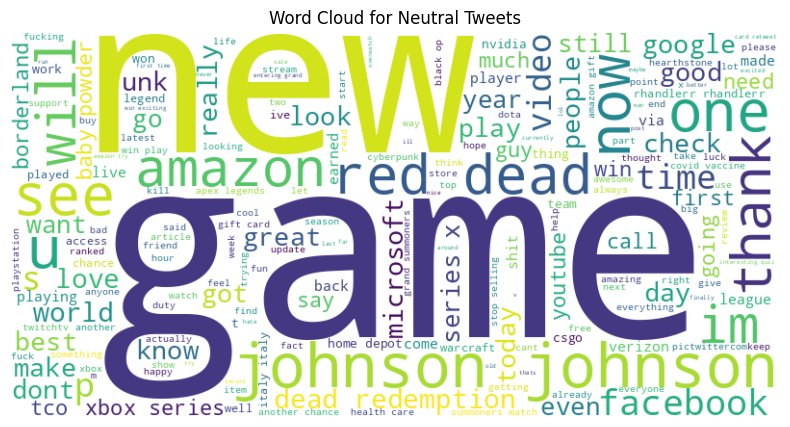

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment_label):
    text = " ".join(df[df['sentiment'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment_label} Tweets")
    plt.show()

# Generating word clouds for each sentiment
generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')


# Step 7: Entity-Level Sentiment Analysis

Group data by entity and sentiment, then visualize sentiment distribution for top entities with a stacked bar chart.


In [11]:
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)
entity_sentiment_counts.head()


sentiment,Irrelevant,Negative,Neutral,Positive
entity,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020


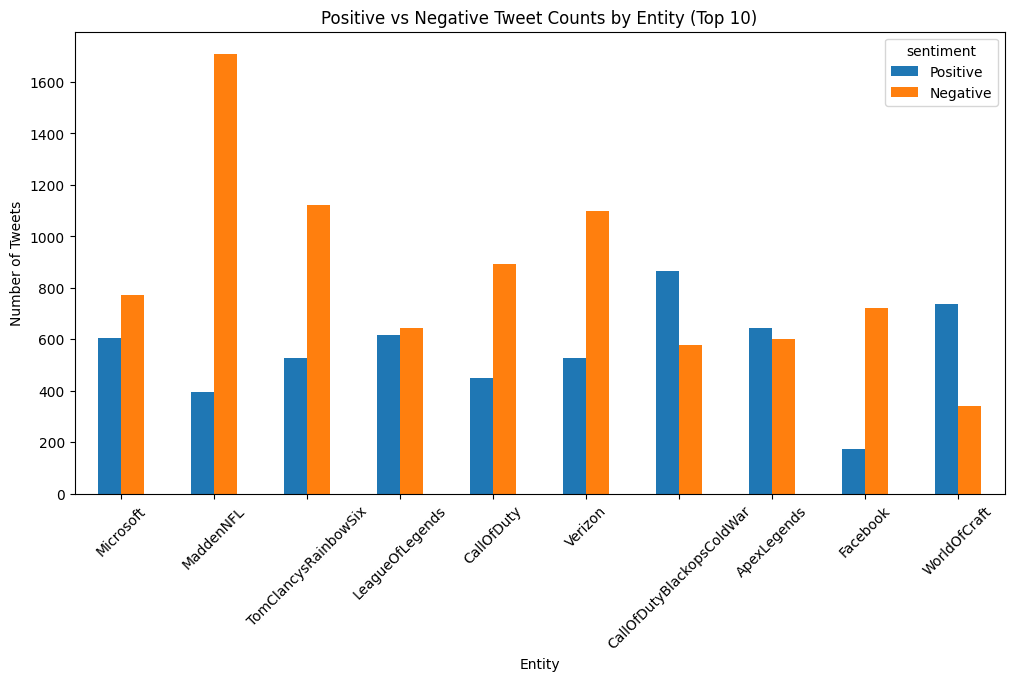

In [14]:
import matplotlib.pyplot as plt

# Selecting top 10 entities by total tweet count
top_entities = df['entity'].value_counts().head(10).index
top_entity_sentiment = entity_sentiment_counts.loc[top_entities]

# Plotting positive vs negative counts per entity
top_entity_sentiment[['Positive', 'Negative']].plot(kind='bar', figsize=(12,6), stacked=False)
plt.title('Positive vs Negative Tweet Counts by Entity (Top 10)')
plt.ylabel('Number of Tweets')
plt.xlabel('Entity')
plt.xticks(rotation=45)
plt.show()


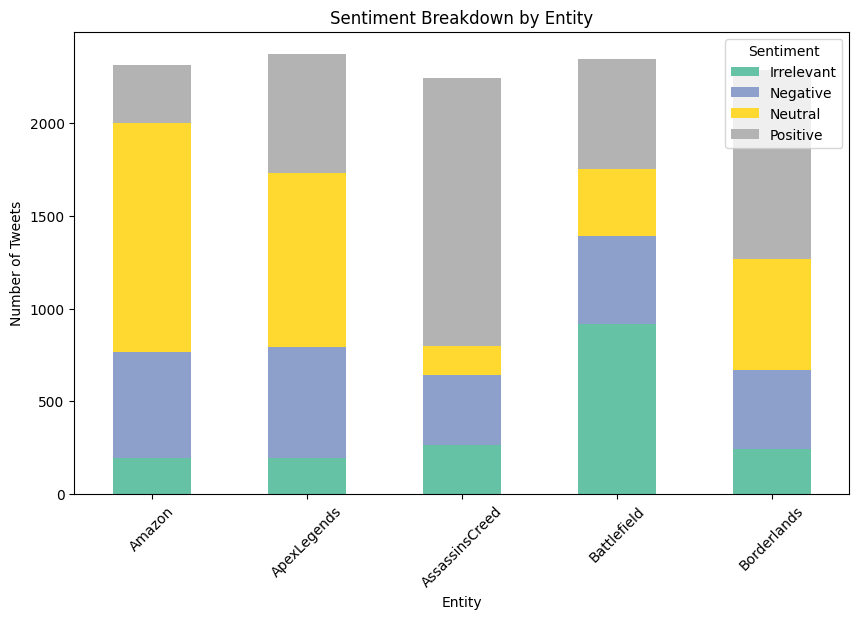

In [15]:
import matplotlib.pyplot as plt

# Selecting entities to plot
entities_to_plot = ['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield', 'Borderlands']

# Filtering data for those entities
plot_data = entity_sentiment_counts.loc[entities_to_plot]

# Plotting stacked bar chart
plot_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Sentiment Breakdown by Entity')
plt.ylabel('Number of Tweets')
plt.xlabel('Entity')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


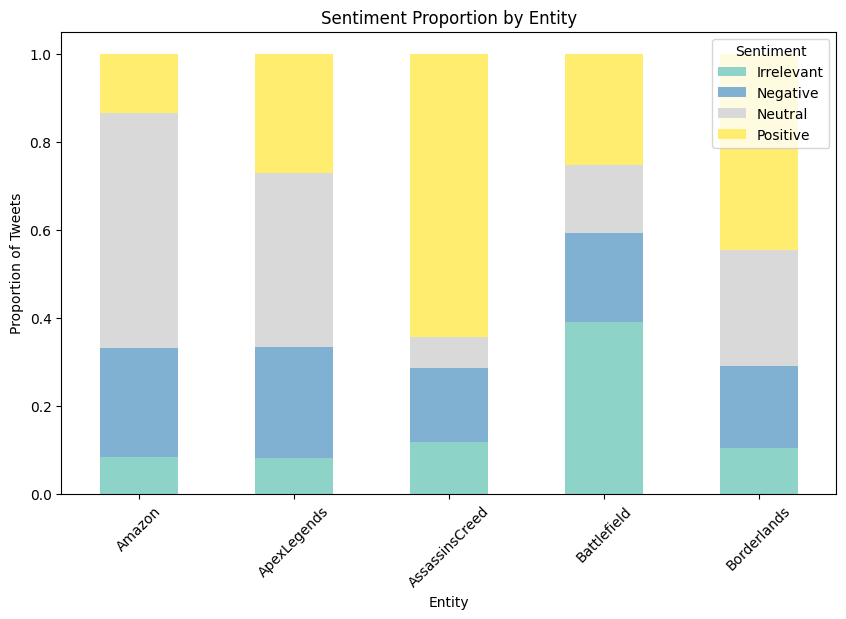

In [16]:
sentiment_ratio = plot_data.div(plot_data.sum(axis=1), axis=0)
sentiment_ratio.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Sentiment Proportion by Entity')
plt.ylabel('Proportion of Tweets')
plt.xlabel('Entity')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


# Step 8: Conclusion

This project involved data cleaning, exploratory data analysis, visualization, and sentiment analysis of Twitter data to understand public opinion trends.  
Insights from this analysis can assist in marketing and brand strategy decisions.
